<a href="https://colab.research.google.com/github/j23-cs167/project-2-matthand11/blob/main/Project2_Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Matt Hand

Proposed Points (out of 25):

*Overall*: 24/25

***

*Problem*: 2/2

I thoroughly explained the dataset I chose to use and what I wanted to predict by using the data.

*Data Prep*: 2/2

I prepared my data thoroughly to make it workable with the four different subsets of data I used, and also normalized the data to make my metrics more accurate.

*Research*: 9/10

I was able to use three different machine learning models we learned in class to thoroughly evaluate each subset of data, and compare the predictive ability of each subset of statistics and each model. I was also able to create an effective graph to showcase my findings in an interpretable way. I deducted one point off my score, as if I had some additional time I would've liked to have dived deeper into possibly having some different subsets or evaluating the differences more. However, I am overally very pleased with what I was able to accomplish and the conclusions I was able to draw.

*Analysis*: 10/10

I was able to use my models and the results of my tests to come to a conclusion to the problem I laid out at the beginning of my work. I also was able to effectively evaluate the differences in effectiveness between different machine learning models we discussed, and why these differences were prominent.

*Bumps in the Road*: 1/1

I didn't really have too many huge issues throughout this project, but I outlined the issues I spent the most time on and how I was able to come up with solutions to solve these isssues.

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

In this machine learning experiment, I will be analyzing an NCAA basketball dataset from the 2018 season. I got this data from user Andrew Sundberg on Kaggle. The full dataset contained data from each season between 2013 and 2021, but I chose to focus on a season that was prior to the COVID-19 pandemic due to its negative effects on the data from the 2020 and 2021 seasons. Within the dataset there are 23 columns and a row for each team in NCAA Division-1. Each column contains a given statistic for each team, with almost all of these statistics being numerical. This will help to make the dataset highly usable.

Through the use of this data, I hope to find out how accurately I am able to predict the amount of wins a team will be able to achieve in a season given different subsets of their stats. By using different subsets of statistics, I hope to be able to conclude which statistics are the most important factors in determining teams' success. Theoretically, the more important a subset of statistic is to teams' success, the more accurately the amount of wins a team achieves could be predicted. This would be useful for NCAA basketball teams to know, as they can focus on improving in certain statistical categories which are the most beneficial to winning games.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

In order to prepare my data for use, there are a few main steps I needed to complete. First, I needed to get my raw data imported from my Google Drive. Once the entire dataset was loaded in to Colab, I could work on splitting it up into different subsets of statistics. To do this, I made column subsets in four categories: offense, defense, rebounding, and efficiency. Once I had these sectioned off, I created a different set of predictor variables for each subset based on what columns were included in the subsets, and set my target variable to be 'W', the amount of wins. After this, I created sets of training and testing data for each subset using train_test_split from sklearn. Then, I normalized each set of data by using StandardScaler from sklearn's preprocessing package.

Once these steps were completed, I was confident that the data was well prepared to be used effectively. By having normalized data with useful subsets divided into training and testing sets, my data was in the necessary shape to use multiple different methods for analysis. I also used the value_counts function to check for any NA data points in the columns I am using, which there were not.

In [5]:
# load and prepare your data here

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = '/content/drive/MyDrive/CS167/Datasets/cbb18.csv'
cbb = pd.read_csv(path)


offense_sub = cbb[['W', 'EFG_O', 'TOR', 'FTR', '2P_O', '3P_O']]
defense_sub= cbb[['W', 'EFG_D', 'TORD', 'FTRD', '2P_D', '3P_D']]
rebounding_sub= cbb[['W', 'ORB', 'DRB']]
efficiency_sub= cbb[['W', 'ADJOE', 'ADJDE']]

off_predictors = ['EFG_O', 'TOR', 'FTR','2P_O','3P_O']
def_predictors = ['EFG_D', 'TORD', 'FTRD', '2P_D', '3P_D']
reb_predictors = ['ORB', 'DRB']
eff_predictors = ['ADJOE', 'ADJDE']
target = "W"
off_train_data, off_test_data, off_train_sln, off_test_sln = \
    train_test_split(offense_sub[off_predictors], offense_sub[target], test_size = 0.2, random_state=41)
def_train_data, def_test_data, def_train_sln, def_test_sln = \
    train_test_split(defense_sub[def_predictors], defense_sub[target], test_size = 0.2, random_state=41)
reb_train_data, reb_test_data, reb_train_sln, reb_test_sln = \
    train_test_split(rebounding_sub[reb_predictors], rebounding_sub[target], test_size = 0.2, random_state=41)
eff_train_data, eff_test_data, eff_train_sln, eff_test_sln = \
    train_test_split(efficiency_sub[eff_predictors], efficiency_sub[target], test_size = 0.2, random_state=41)

## Normalize offense data
off_scaler = preprocessing.StandardScaler().fit(off_train_data)
otr_norm = off_scaler.transform(off_train_data)
ote_norm = off_scaler.transform(off_test_data)

## Normalize defense data
def_scaler = preprocessing.StandardScaler().fit(def_train_data)
dtr_norm = def_scaler.transform(def_train_data)
dte_norm = def_scaler.transform(def_test_data)

## Normalize Rebound data
reb_scaler = preprocessing.StandardScaler().fit(reb_train_data)
rtr_norm = reb_scaler.transform(reb_train_data)
rte_norm = reb_scaler.transform(reb_test_data)

## Normalize efficiency data
eff_scaler = preprocessing.StandardScaler().fit(eff_train_data)
etr_norm = eff_scaler.transform(eff_train_data)
ete_norm = eff_scaler.transform(eff_test_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Research

Put your code and your experiments here.

Random Forests: 
Off R2:  0.49757979040908507
Def R2:  0.47214691407912446
Reb R2:  -0.013461901424794753
Eff R2:  0.5089296570221913
SGD: 
Off R2: 0.5479781312437365
Def R2: 0.5628729439508766
Reb R2: 0.19393120904006167
Eff R2: 0.6260590466956967
MLP: 
Off R2: 0.4996138065418453
Def R2: 0.5743674571494117
Reb R2: 0.13726729467305343
Eff R2: 0.6094324738774899


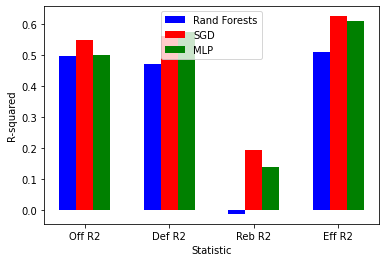

In [28]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.


# Using Random Forests

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

print("Random Forests: ")
## Offense
off_forest = RandomForestRegressor(random_state = 0, n_estimators=1000)
off_forest.fit(otr_norm,off_train_sln)
off_predictions = off_forest.predict(ote_norm)

off_forest_rs2= metrics.r2_score(off_test_sln, off_predictions)
print("Off R2: ", off_forest_rs2)

## Defense
def_forest = RandomForestRegressor(random_state = 0, n_estimators=1000)
def_forest.fit(dtr_norm,def_train_sln)
def_predictions = def_forest.predict(dte_norm)

def_forest_rs2= metrics.r2_score(def_test_sln, def_predictions)
print("Def R2: ", def_forest_rs2)

## Rebounding
reb_forest = RandomForestRegressor(random_state = 0, n_estimators=1000)
reb_forest.fit(rtr_norm,reb_train_sln)
reb_predictions = reb_forest.predict(rte_norm)

reb_forest_rs2= metrics.r2_score(reb_test_sln, reb_predictions)
print("Reb R2: ", reb_forest_rs2)

## Efficiency
eff_forest = RandomForestRegressor(random_state = 0, n_estimators=1000)
eff_forest.fit(etr_norm,eff_train_sln)
eff_predictions = eff_forest.predict(ete_norm)

eff_forest_rs2= metrics.r2_score(eff_test_sln, eff_predictions)
print("Eff R2: ", eff_forest_rs2)


# Using SGD (code taken and modified from day 9 lecture code)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

print("SGD: ")
## Offense
sgd.fit(otr_norm, off_train_sln)
off_sgd_pred = sgd.predict(ote_norm)
off_sgd_r2= metrics.r2_score(off_test_sln, off_sgd_pred)
print("Off R2:", off_sgd_r2)

## Defense
sgd.fit(dtr_norm, def_train_sln)
def_sgd_pred = sgd.predict(dte_norm)
def_sgd_r2= metrics.r2_score(def_test_sln, def_sgd_pred)
print("Def R2:", def_sgd_r2)

## Rebounding
sgd.fit(rtr_norm, reb_train_sln)
reb_sgd_pred = sgd.predict(rte_norm)
reb_sgd_r2= metrics.r2_score(reb_test_sln, reb_sgd_pred)
print("Reb R2:", reb_sgd_r2)

## Efficiency
sgd.fit(etr_norm, eff_train_sln)
eff_sgd_pred = sgd.predict(ete_norm)
eff_sgd_r2= metrics.r2_score(eff_test_sln, eff_sgd_pred)
print("Eff R2:", eff_sgd_r2)



# Using MLP (code taken and modified from day 10 lecture code)

print("MLP: ")
from sklearn.neural_network import MLPRegressor

## Offense
off_mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = 1000)
off_mlp.fit(otr_norm,off_train_sln)
off_mlp_pred = off_mlp.predict(ote_norm)
off_mlp_r2= metrics.r2_score(off_test_sln, off_mlp_pred)
print("Off R2:", off_mlp_r2)

##Defense
def_mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = 1000)
def_mlp.fit(dtr_norm,def_train_sln)
def_mlp_pred = def_mlp.predict(dte_norm)
def_mlp_r2= metrics.r2_score(def_test_sln, def_mlp_pred)
print("Def R2:", def_mlp_r2)

## Rebounding
reb_mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = 1000)
reb_mlp.fit(rtr_norm,reb_train_sln)
reb_mlp_pred = reb_mlp.predict(rte_norm)
reb_mlp_r2= metrics.r2_score(reb_test_sln, reb_mlp_pred)
print("Reb R2:", reb_mlp_r2)

## Efficiency
eff_mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = 1000)
eff_mlp.fit(etr_norm,eff_train_sln)
eff_mlp_pred = eff_mlp.predict(ete_norm)
eff_mlp_r2= metrics.r2_score(eff_test_sln, eff_mlp_pred)
print("Eff R2:", eff_mlp_r2)



#Graph (used https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/ for help with creating clustered bar chart)

import matplotlib.pyplot as plt

x = np.arange(4)
randforgraph = [off_forest_rs2, def_forest_rs2, reb_forest_rs2, eff_forest_rs2]
sgdgraph = [off_sgd_r2, def_sgd_r2, reb_sgd_r2, eff_sgd_r2]
mlpgraph = [off_mlp_r2, def_mlp_r2, reb_mlp_r2, eff_mlp_r2]
width = 0.2

plt.bar(x-0.2, randforgraph, width, color='blue')
plt.bar(x, sgdgraph, width, color='red')
plt.bar(x+0.2, mlpgraph, width, color='green')
plt.xticks(x, ['Off R2', 'Def R2', 'Reb R2', 'Eff R2'])
plt.xlabel("Statistic")
plt.ylabel("R-squared")
plt.legend(["Rand Forests", "SGD", "MLP"])
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

In all, the main discovery I made by running this project as it relates to the insight I was hoping to gain for NCAA basketball teams is that the most important statistics overall to contribute to winning games are overall offensive and defensive efficiency stats. In every model I ran, the efficiency statistic had greater correlation to the amount of games won than any of the other statistical categories. This makes sense, as it is a more advanced, aggregated stat to measure teams' overall performance. 

Following this, it appears that defense may be more important to winning games overall than offense. As the classic saying goes, "defense wins championships", and this is backed up here. For both of the more accurate models run, SGD and MLP, defense had a higher r-squared value than offense, meaning it is a better predictor of a team's number of wins.

A machine learning-related takeaway I have from running this experiment is that the use of the more advanced models we learned in class, Stochastic Gradient Descent and Multilayer Perceptrons, were significantly better predictors than the best of the more basic models we used in the first half of class, random trees. This is logical, as deep learning techniques should theoretically be able to grasp the data better than more basic models. However, I was surprised just how significantly better the deep learning models performed. I think this large gap in prediction ability is the result of deep learning models having much more complex processes through the use of many layers and perceptrons. This allows the algorithm to gain a fuller grasp on the data's whole features, rather than only focusing on individual data inputs.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The biggest challenge I faced throughout this project was determining what dataset I would like to use. The process of choosing a dataset was much more involved than I expected, as I hoped to find a dataset that was mostly or entirely complete with no missing values, and was useful for trying some deep learning methods that we discussed in the second half of this class. I eventually settled on using an older rendition of this college basketball dataset, as it was something I was interested in evaluating, and the older sets were not marred by inconsistencies and missing data as were newer ones throughout the time of the COVID pandemic. I ultimately think I made a good choice, as I did not face any significant issues when using this dataset; it was much more useable than the set I used on my previous project. 

The other major challenge I faced was figuring out how I wanted to visualize my data, and how I would be able to do so. I knew that I wanted to seperate out the different statistical categories, as the main point I wanted to evaluate was which statistical category was the best predictor of success in games. However, since I used multiple models to gather predictions, I also needed a way to keep those seperated. Therefore, it made logical sense to use a clustered column bar chart, but I had never created one in Python before. I was eventually able to use documentation from geeksforgeeks.org to help me through outlining the process of making this type of chart, then tweaked the documented code and used my inputs to create an effective chart. 